# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
queryURL = f"{url}appid={weather}&units={units}&q="

response = requests.get(queryURL + city).json()

In [4]:
# set up empty lists for needed characters
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
processingRecord = 0
setNumber = 1

#start processing record at 1
processingRecord = 1
setNumber = 1

print("Beginning Data Retrieval")
print("-------------------------")

# loop through each city
for city in cities:
    
#Exception handling
    try:
        response = requests.get(queryURL + city).json()
        city_id.append(response['id'])
        city_name.append(response['name']) 
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max']) 
        wind_speed.append(response['wind']['speed'])
        cityResponse = response['name']   
        if processingRecord > 49:
            processingRecord = 0
            setNumber = setNumber + 1
    
        else:
            processingRecord = processingRecord + 1

        print(f"Processing Record {processingRecord} of {setNumber} | {cityResponse}")
        
    except:
        print("city not found. Skipping ...")
    continue
    
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 2 of 1 | Chegdomyn
Processing Record 3 of 1 | Faya
city not found. Skipping ...
Processing Record 4 of 1 | El Vigia
Processing Record 5 of 1 | Egvekinot
Processing Record 6 of 1 | Lipin Bor
Processing Record 7 of 1 | Vaini
Processing Record 8 of 1 | Washougal
Processing Record 9 of 1 | Milledgeville
Processing Record 10 of 1 | Rikitea
Processing Record 11 of 1 | Cape Town
Processing Record 12 of 1 | Port Hardy
Processing Record 13 of 1 | Thompson
Processing Record 14 of 1 | Cidreira
Processing Record 15 of 1 | Karakol
Processing Record 16 of 1 | ‘Āhuimanu
Processing Record 17 of 1 | Mugumu
city not found. Skipping ...
city not found. Skipping ...
Processing Record 18 of 1 | Albany
Processing Record 19 of 1 | Hermanus
Processing Record 20 of 1 | Mahébourg
Processing Record 21 of 1 | Stornoway
Processing Record 22 of 1 | Hambantota
Processing Record 23 of 1 | Praia da Vitória
Processing Record 24 of 1 | Bluff
Processing

Processing Record 2 of 5 | Dukat
Processing Record 3 of 5 | Salamiyah
Processing Record 4 of 5 | Båtsfjord
Processing Record 5 of 5 | Vila Velha
Processing Record 6 of 5 | Arraial do Cabo
Processing Record 7 of 5 | Preston
city not found. Skipping ...
Processing Record 8 of 5 | Labytnangi
Processing Record 9 of 5 | Morondava
Processing Record 10 of 5 | Valle de Allende
Processing Record 11 of 5 | Saint-Philippe
Processing Record 12 of 5 | Cherskiy
Processing Record 13 of 5 | Samora Correia
city not found. Skipping ...
city not found. Skipping ...
Processing Record 14 of 5 | Kaspiysk
Processing Record 15 of 5 | Flinders
Processing Record 16 of 5 | Mossamedes
city not found. Skipping ...
Processing Record 17 of 5 | Aquin
Processing Record 18 of 5 | Soyo
Processing Record 19 of 5 | Khonsa
Processing Record 20 of 5 | Mount Gambier
Processing Record 21 of 5 | Esperance
Processing Record 22 of 5 | Saskylakh
Processing Record 23 of 5 | Dingle
Processing Record 24 of 5 | Saint-Leu
Processing R

Processing Record 0 of 9 | Parkland
Processing Record 1 of 9 | Balkanabat
Processing Record 2 of 9 | Chengannūr
Processing Record 3 of 9 | Slave Lake
Processing Record 4 of 9 | Daru
Processing Record 5 of 9 | Puerto Madero
Processing Record 6 of 9 | Oktyabr'skiy
Processing Record 7 of 9 | Campoverde
Processing Record 8 of 9 | Traverse City
Processing Record 9 of 9 | Meulaboh
Processing Record 10 of 9 | Srīvardhan
Processing Record 11 of 9 | Linqiong
Processing Record 12 of 9 | Baculin
Processing Record 13 of 9 | Kieta
Processing Record 14 of 9 | Vao
Processing Record 15 of 9 | Bayan
Processing Record 16 of 9 | Formosa
Processing Record 17 of 9 | Balabac
Processing Record 18 of 9 | Puerto Palomas
Processing Record 19 of 9 | Hokitika
Processing Record 20 of 9 | Northam
Processing Record 21 of 9 | Hackettstown
Processing Record 22 of 9 | Atikokan
Processing Record 23 of 9 | Cortland
Processing Record 24 of 9 | Sistranda
Processing Record 25 of 9 | Rozsypne
Processing Record 26 of 9 | Pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherDict = {
    "City ID":city_id, 
    "City Name":city_name, 
    "Cloudiness":cloudiness,
    "Country":country, 
    "Date":date, 
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng, 
    "Max Temperature":max_temp,
    "Wind Speed":wind_speed
}
weatherDict = pd.DataFrame(weatherDict)
weatherDict.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,2025579,Chegdomyn,0,RU,1658710985,58,51.1167,133.0167,77.34,2.95
1,110690,Faya,100,SA,1658710901,64,18.3851,42.4509,63.05,8.95
2,3641099,El Vigia,36,VE,1658710986,80,8.6219,-71.6506,78.48,4.56
3,4031742,Egvekinot,100,RU,1658710887,62,66.3167,-179.1667,42.66,3.02
4,535113,Lipin Bor,100,RU,1658710987,96,60.2622,37.9763,61.97,3.49


In [6]:
weatherDict.count()

City ID            569
City Name          569
Cloudiness         569
Country            569
Date               569
Humidity           569
Latitude           569
Longitude          569
Max Temperature    569
Wind Speed         569
dtype: int64

In [7]:
weatherDict.to_csv("output_data/weatherDict.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
maxHumid = weatherDict.loc[weatherDict['Humidity'] != 100]
maxHumid.describe()

,City ID,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
count,5.590000e+02,559.000000,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000
mean,2.628000e+06,52.048301,1.658711e+09,71.883721,19.110830,20.159943,69.384347,7.175116
std,1.697073e+06,41.044990,1.394231e+02,19.820676,33.332785,90.744005,13.372363,4.906290
min,6.001900e+04,0.000000,1.658710e+09,1.000000,-54.800000,-179.166700,24.040000,0.000000
25%,1.337618e+06,7.000000,1.658711e+09,63.000000,-8.216400,-59.543350,60.615000,3.440000
50%,2.160735e+06,53.000000,1.658711e+09,76.000000,22.075200,26.891000,71.130000,5.790000
75%,3.662625e+06,99.000000,1.658711e+09,87.000000,46.541650,100.975850,79.260000,10.135000
max,7.671223e+06,100.000000,1.658711e+09,99.000000,78.218600,179.316700,105.870000,24.610000


In [9]:
#  Get the indices of cities that have humidity over 100%.
maxHumid.count()

City ID            559
City Name          559
Cloudiness         559
Country            559
Date               559
Humidity           559
Latitude           559
Longitude          559
Max Temperature    559
Wind Speed         559
dtype: int64

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
maxHumid.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,2025579,Chegdomyn,0,RU,1658710985,58,51.1167,133.0167,77.34,2.95
1,110690,Faya,100,SA,1658710901,64,18.3851,42.4509,63.05,8.95
2,3641099,El Vigia,36,VE,1658710986,80,8.6219,-71.6506,78.48,4.56
3,4031742,Egvekinot,100,RU,1658710887,62,66.3167,-179.1667,42.66,3.02
4,535113,Lipin Bor,100,RU,1658710987,96,60.2622,37.9763,61.97,3.49


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

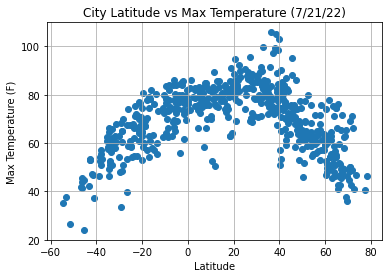

In [12]:
plt.scatter(maxHumid["Latitude"], maxHumid["Max Temperature"])
plt.title("City Latitude vs Max Temperature (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

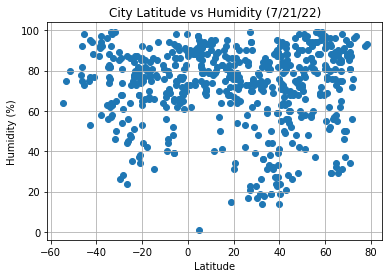

In [13]:
plt.scatter(maxHumid["Latitude"], maxHumid["Humidity"])
plt.title("City Latitude vs Humidity (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

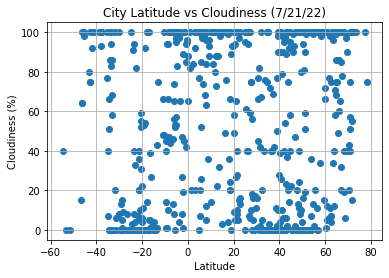

In [14]:
plt.scatter(maxHumid["Latitude"], maxHumid["Cloudiness"])
plt.title("City Latitude vs Cloudiness (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

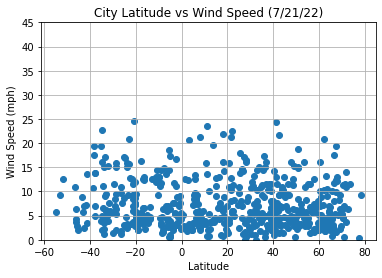

In [15]:
plt.scatter(maxHumid["Latitude"], maxHumid["Wind Speed"])
plt.title("City Latitude vs Wind Speed (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,45)
plt.grid()
plt.show()

## Linear Regression

In [16]:
north = maxHumid['Latitude'] >= 0
northernHem = maxHumid[north]
southernHem = maxHumid[~north]

 Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.4175683096852664


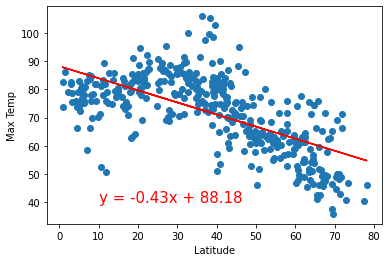

In [17]:
x_values = northernHem['Latitude']
y_values = northernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6287596027163292


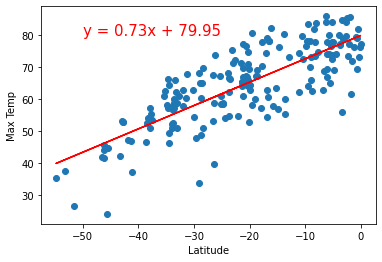

In [18]:
x_values = southernHem['Latitude']
y_values = southernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 6.651948290110827e-06


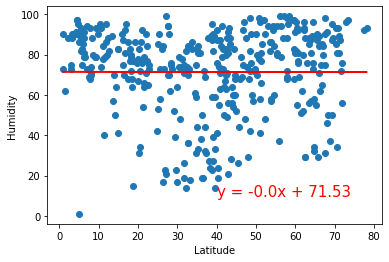

In [19]:
x_values = northernHem['Latitude']
y_values = northernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.0021620885957578527


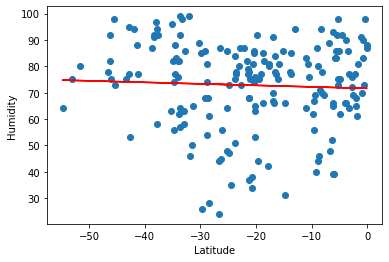

In [20]:
x_values = southernHem['Latitude']
y_values = southernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0002265280258659084


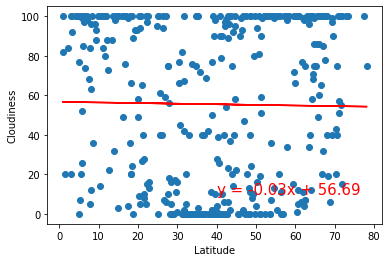

In [21]:
x_values = northernHem['Latitude']
y_values = northernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0030568906870578807


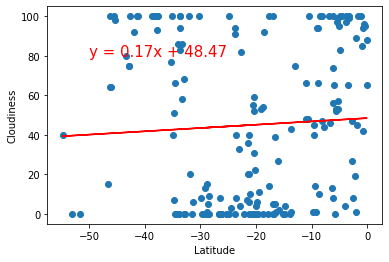

In [22]:
x_values = southernHem['Latitude']
y_values = southernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0023412715149819046


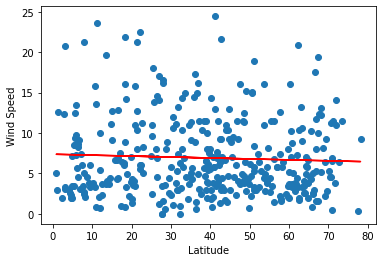

In [23]:
x_values = northernHem['Latitude']
y_values = northernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.015565352053713009


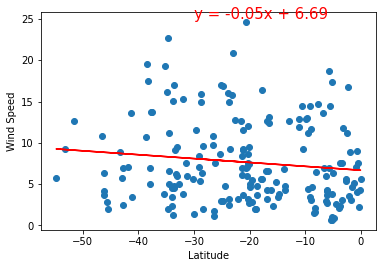

In [24]:
x_values = southernHem['Latitude']
y_values = southernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.show()